## EDA And Feature Engineering Flight Price Prediction
check the dataset info below
https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

1.Airline: The airline company operating the flight.

2.Date_of_Journey: The date when the flight journey takes place.

3.Source: The city from which the flight originates.

4.Destination: The city to which the flight is headed.

5.Route: The route taken by the flight, which may include multiple stopovers.

6.Dep_Time: The departure time of the flight.

7.Arrival_Time: The arrival time of the flight.

8.Duration: The duration of the flight.

9.Total_Stops: The total number of stops or layovers during the flight journey.

10.Additional_Info: Additional information or remarks about the flight.

11.Price: The price of the flight ticket.

__Perform Exploratory Data Analysis (EDA) by:__

1.Importing the Libraries

2.Loading the data.

3.Checking for missing values.

4.Summarizing the data.

5.Feature Engineering

6.Exploring relationships between variables.

7.Visualizing the data.

8.Feature Encoding

## Importing basics libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

__Loading the data__

In [2]:
df=pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


**Reading the last five rows of dataset**

In [3]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


## Get the basics info about data

**Dimensions of data i.e rows and columns**

In [4]:
df.shape

(10683, 11)

__Checking for missing values and data types__

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


 **Majority of columns containing object data types like 'date_of_journey' and 'Dep_time', feature engineering is essential for enhancing the dataset's usability.**

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

**Based on our analysis, it appears that only the 'route' and 'total stops' columns contain missing values, with each column having just one missing value. Hence, a straightforward approach would be to remove these null values from the dataset.**

**Remove the missing values**

In [7]:
df.dropna(inplace=True)

In [8]:
df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Feature Engineering

In [10]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
 11  Date             10682 non-null  object
 12  Month            10682 non-null  object
 13  Year             10682 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.2+ MB


**Converting the 'date', 'month', and 'year' columns from object to integer data types is essential for better data compatibility and analysis.**

In [12]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
 11  Date             10682 non-null  int32 
 12  Month            10682 non-null  int32 
 13  Year             10682 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.1+ MB


In [14]:
## Drop Date Of Journey

df.drop('Date_of_Journey',axis=1,inplace=True)

In [15]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [16]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [17]:
df['Arrival_hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_min']=df['Arrival_Time'].str.split(':').str[1]

In [18]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [19]:
df['Arrival_hour']=df['Arrival_hour'].astype(int)
df['Arrival_min']=df['Arrival_min'].astype(int)

In [20]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [21]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [22]:
df['Departure_hour']=df['Dep_Time'].str.split(':').str[0]
df['Departure_min']=df['Dep_Time'].str.split(':').str[1]

In [23]:
df['Departure_hour']=df['Departure_hour'].astype(int)
df['Departure_min']=df['Departure_min'].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Date             10682 non-null  int32 
 10  Month            10682 non-null  int32 
 11  Year             10682 non-null  int32 
 12  Arrival_hour     10682 non-null  int32 
 13  Arrival_min      10682 non-null  int32 
 14  Departure_hour   10682 non-null  int32 
 15  Departure_min    10682 non-null  int32 
dtypes: int32(7), int64(1), object(8)
memory usage: 1.1+ MB


In [25]:
df.drop('Dep_Time',axis=1,inplace=True)

In [26]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


__Checking For unique values__

In [27]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [28]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min


In [29]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [30]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

##### Converting the categorical categories in the 'Total_Stops' column to numerical values streamlines the data for numerical analysis and modeling.

In [31]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [32]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min


In [33]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50


##### We can safely drop the 'route' column since we already have information about the source and destination, avoiding redundancy in the dataset.


In [34]:
df.drop('Route',axis=1,inplace=True)

In [35]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50


In [36]:
df['Duration'].str.split(' ').str[0].str.split('h').str[0]

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration, Length: 10682, dtype: object

In [37]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,1,3,2019,21,35,16,50


## Visualizing the data

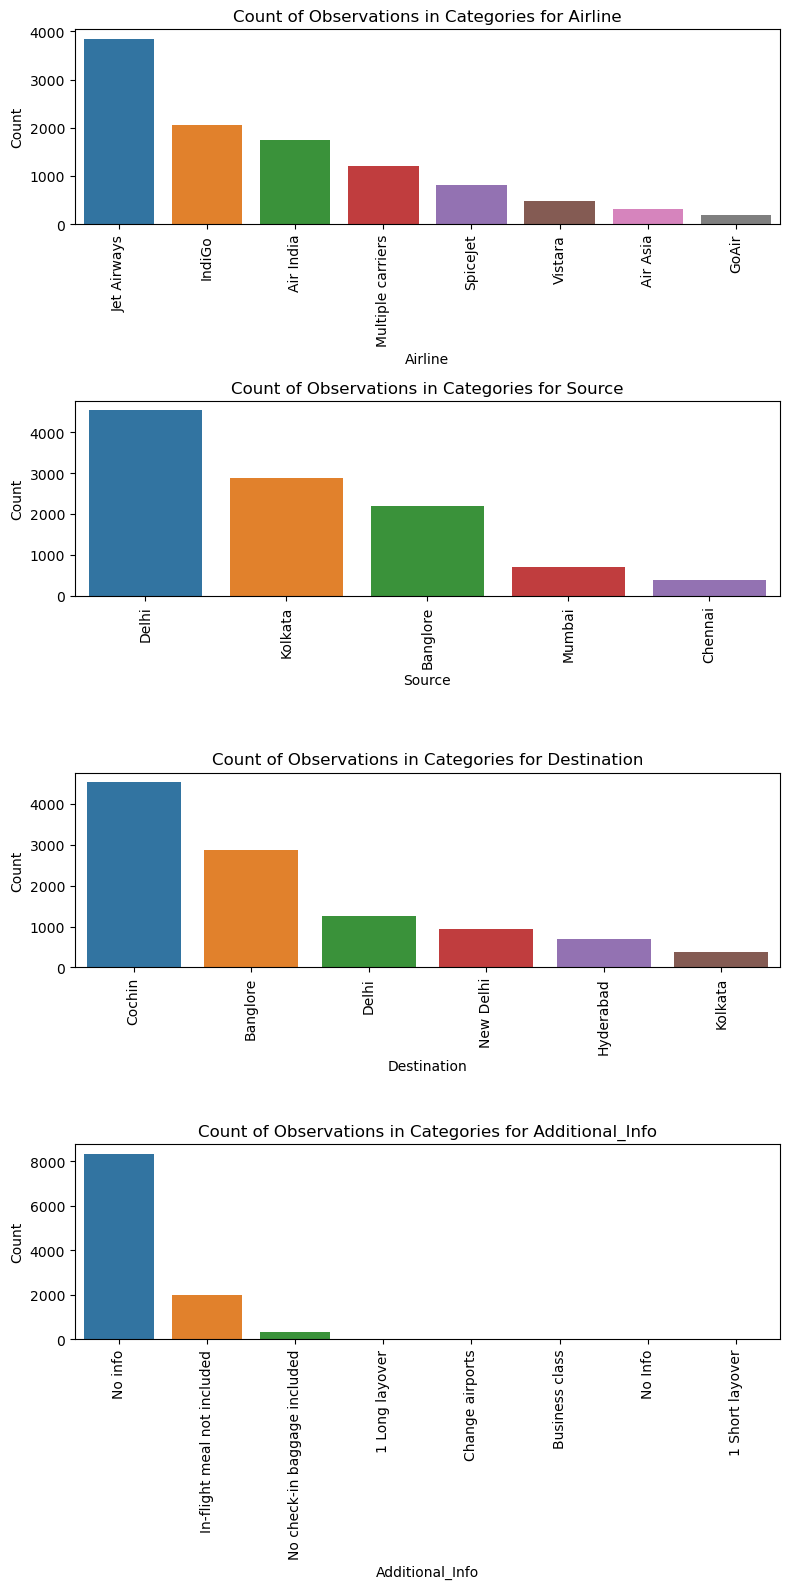

In [38]:
categorical_cols = ['Airline', 'Source', 'Destination','Additional_Info']
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(8, len(categorical_cols) * 4))
for i, col in enumerate(categorical_cols):
    category_counts = df[col].value_counts()
    top_categories = category_counts.head(8).index
    data_subset = df[df[col].isin(top_categories)]
    sns.countplot(x=col, data=data_subset, order=top_categories, ax=axes[i])
    
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Count of Observations in Categories for {col}')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

**Insights** 
##### To improve service usage, consider enhancing offerings for airlines like GoAir, which see lower usage. Given Delhi's popularity as a departure point with around 5000 departures, focusing efforts there could yield better results. Prioritizing routes to preferred destinations like Cochin and Bangalore might also attract more passengers.

C:\Users\SANJAY KUMAR\AppData\Local\Temp\ipykernel_5252\3711752448.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Price'],kde=True,color='Red')
C:\Users\SANJAY KUMAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


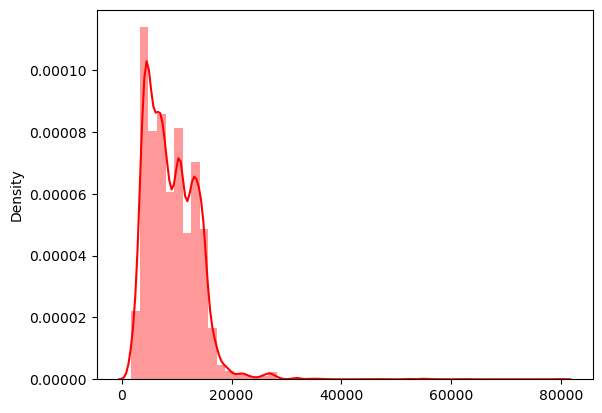

In [39]:
sns.distplot(x=df['Price'],kde=True,color='Red')
plt.show()

##### The graph shows high density across the range of 0 to 20000, with a notable peak around 5000.

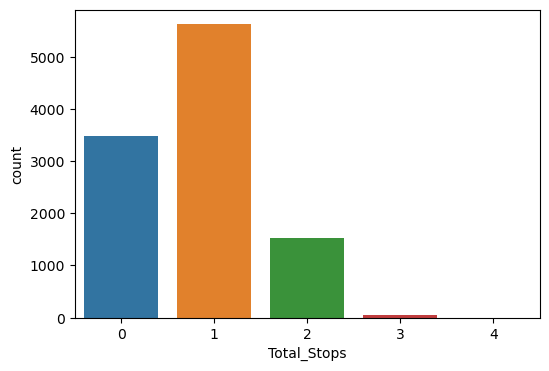

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Total_Stops')
plt.show()

__Insights__ The predominant occurrence of 0 and 1 stops between source and destination is notable. This suggests that the majority of flights operate as direct or with just one layover, indicating a preference for shorter travel durations among passengers.

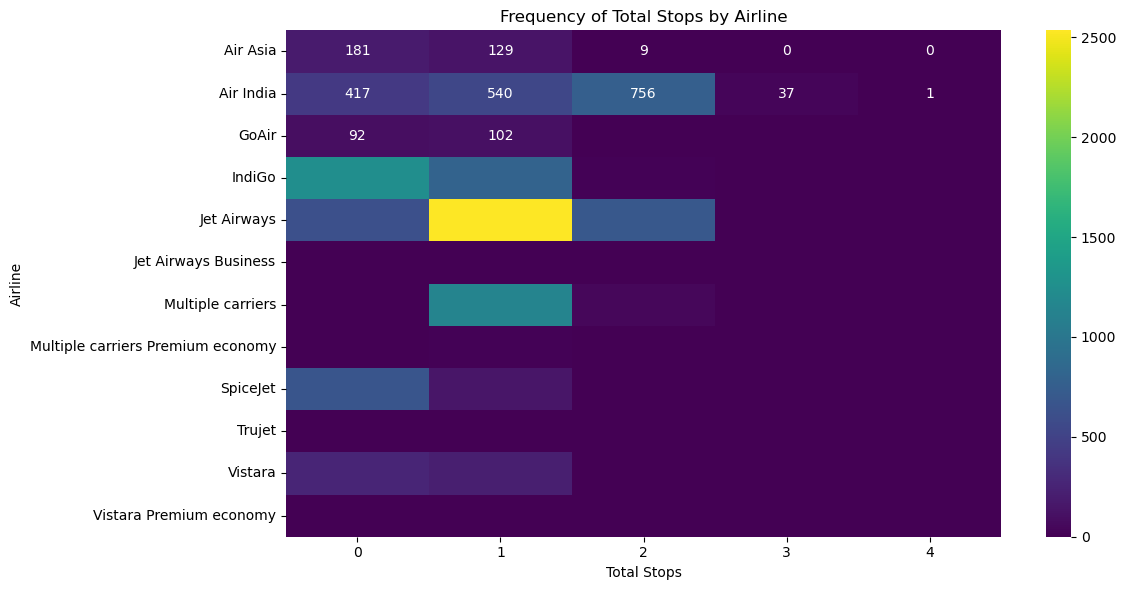

In [47]:
plt.figure(figsize=(12, 6))
cross_tab = pd.crosstab(df['Airline'], df['Total_Stops'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Total Stops')
plt.ylabel('Airline')
plt.title('Frequency of Total Stops by Airline')
plt.tight_layout()
plt.show()

**The analysis reveals that the majority of airline companies offer flights with two stops or fewer between the source and destination. Specifically, the highly utilized airline companies such as Jet Airways predominantly provide flights with just one stop, while Indigo is favored for its direct flights with zero stops. Understanding these preferences can guide strategic decisions for route optimization and service offerings, aligning with customer demands and enhancing overall customer satisfaction.**

In [ ]:
df['Airline'].unique()

In [ ]:
df['Source'].unique()

In [ ]:
df['Additional_Info'].unique()

## Feature Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

**Utilizing one-hot encoding is a suitable approach to convert categorical values, such as those in the 'Airline', 'Source', and 'Additional_Info' columns, into numerical format. This transformation allows machine learning algorithms to process these variables effectively, capturing their categorical nature without imposing ordinal relationships.**

In [ ]:
encoder=OneHotEncoder()

In [ ]:
encoder.fit_transform(df[['Airline','Source','Destination']]).toarray()

In [ ]:
pd.DataFrame(encoder.fit_transform(df[['Airline','Source','Destination']]).toarray(),columns=encoder.get_feature_names_out())